In [1]:
"""
@author: Bai Dongxin
Created on 5.29
"""

'\n@author: Bai Dongxin\nCreated on 5.29\n'

In [2]:
# 导入库文件
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [3]:
# 导入数据集
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer() 
print("cancer.keys():{}".format(cancer.keys())) #查看cancer数据的keys
print("cancer数据的形状:{}".format(cancer.data.shape)) #查看数据集形状
print("cancer数据:\n{}".format(cancer.feature_names)) # 查看标签名

cancer.keys():dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
cancer数据的形状:(569, 30)
cancer数据:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# 数据预处理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler #导入缩放器类
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,random_state=0)
# 归一化
scaler=MinMaxScaler() #创建0-1缩放器
scaler.fit(X_train) #拟合数据，即计算特征的最大值和最小值
X_train_scaled=scaler.transform(X_train) #将X_train缩放到[0,1]内
X_test_scaled=scaler.transform(X_test) #将X_test缩放到[0,1]内


In [19]:
# 初步最优寻参
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
parameters = {  'kernel':['linear','rbf','poly','sigmoid'], 
                'C':[i for i in range(1,5000,100)],
                'gamma':[0.1,0.01,0.001,0.0001,0.00001]}
svc = SVC()
grid = GridSearchCV(svc, parameters, cv=10) 
grid.fit(X_train_scaled, y_train)
print("最优超参数组合：",grid.best_params_)

最优超参数组合： {'C': 201, 'gamma': 0.1, 'kernel': 'rbf'}


In [21]:
# C粒度更细的最优寻参
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
parameters = {'kernel':['linear','rbf','poly','sigmoid'], 'C':[i for i in range(100,300)],'gamma':[0.1]}
svc = SVC()
grid = GridSearchCV(svc, parameters, cv=10) 
grid.fit(X_train_scaled, y_train)
print("最优超参数组合：",grid.best_params_)

最优超参数组合： {'C': 172, 'gamma': 0.1, 'kernel': 'rbf'}


In [18]:
# 选用最优参数进行训练
print("Train...")
svm=SVC(kernel='rbf',C=172,gamma=0.1)
svm.fit(X_train_scaled,y_train) 
print('Train finished')
print("调参后已缩放训练集上准确度:{:.4f}".format(svm.score(X_train_scaled,y_train)))
print("调参后已缩放测试集上准确度:{:.4f}".format(svm.score(X_test_scaled,y_test)))

Train...
Train finished
调参后已缩放训练集上准确度:0.9859
调参后已缩放测试集上准确度:0.9720


Predict...
accuracy:  0.972027972027972
分类正确的： [51, 88]
总的测试标签： [53, 90]
良性类别的预测准确度:96.226%
良性类别的预测准确度:97.778%


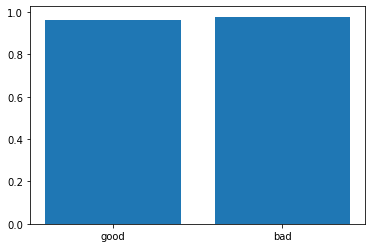

In [22]:
# 预测
print("Predict...")
prediction = svm.predict(X_test_scaled)
# 评估
%matplotlib inline
import matplotlib.pyplot as plt
classes = cancer.feature_names
print("accuracy: ", accuracy_score(prediction, y_test))
accurate=[0]*2
sumall=[0]*2
i=0
while i<len(y_test):
    sumall[y_test[i]]+=1
    if prediction[i]==y_test[i]:
        accurate[y_test[i]]+=1
    i+=1
print("分类正确的：",accurate)
print("总的测试标签：",sumall)
svm_accuary_list = [accurate[i]/sumall[i] for i in range(2)]

plt.bar(['good','bad'],svm_accuary_list)
print('良性类别的预测准确度:{:.3f}%'.format(svm_accuary_list[0]*100))
print('良性类别的预测准确度:{:.3f}%'.format(svm_accuary_list[1]*100))